Left Down point: 0.0 0.0
Right Up point:  6000.0 11180.0
height (min, max) 0.0 357.21




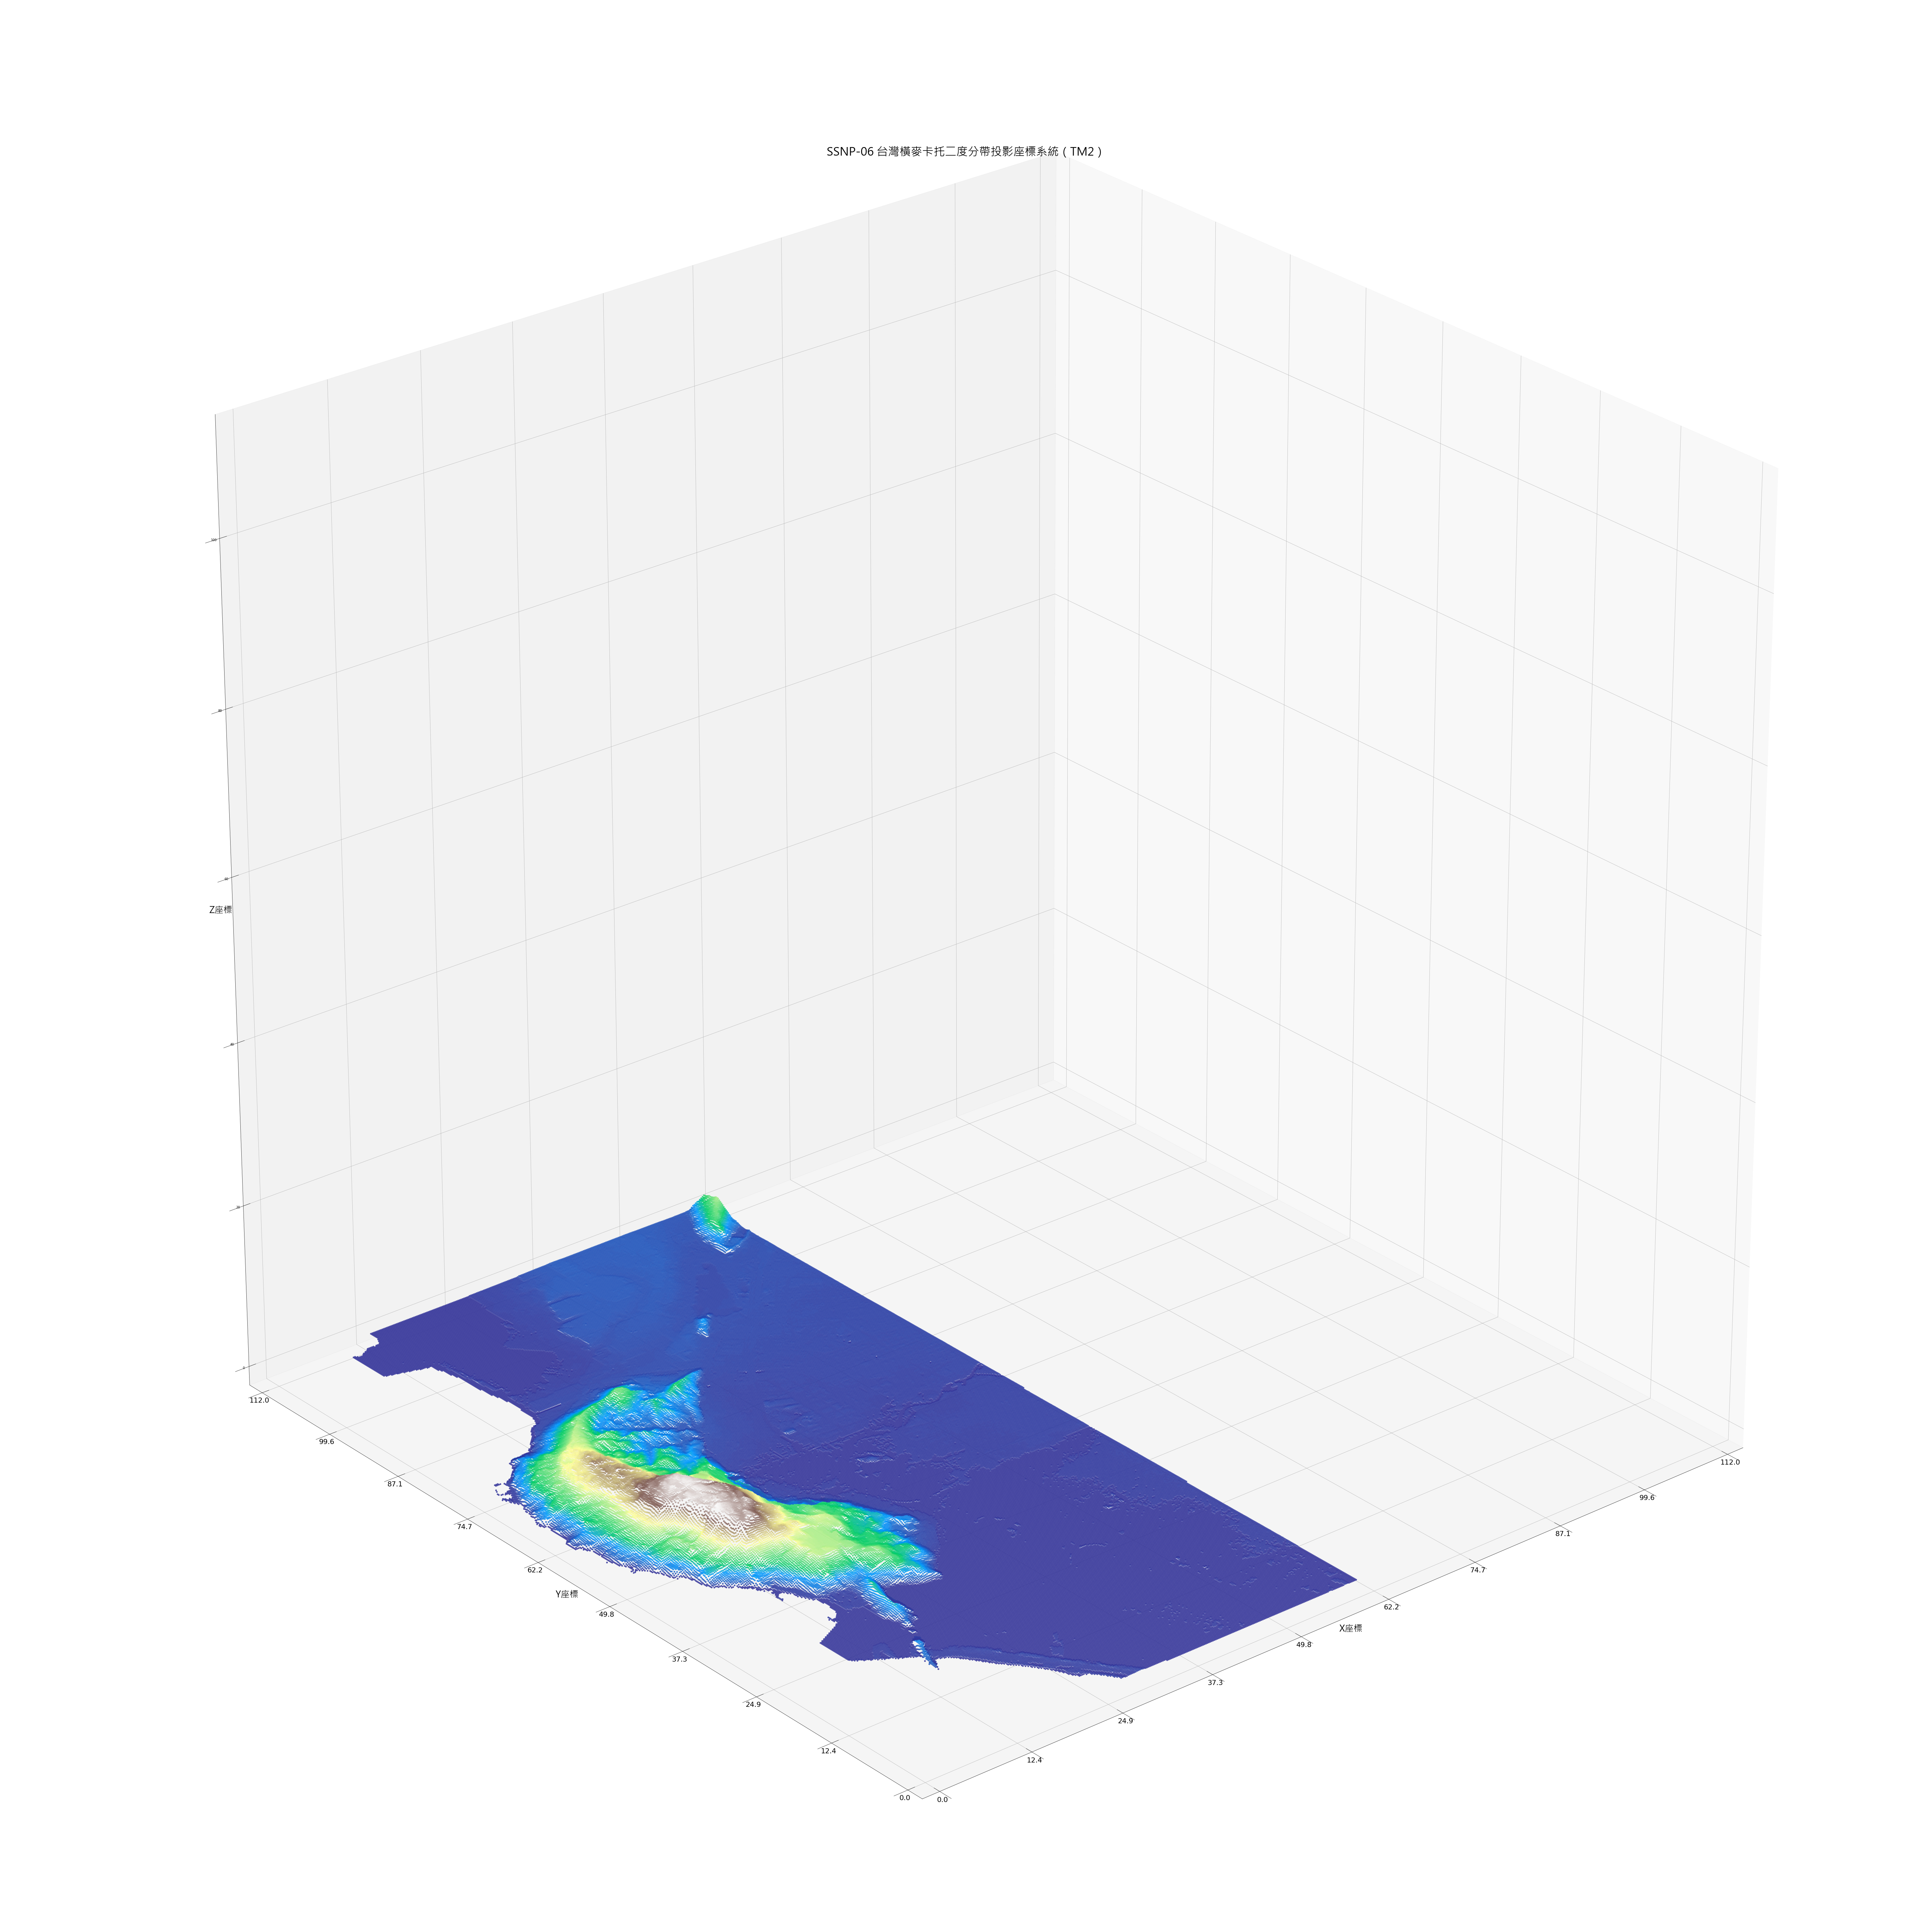

Done


<Figure size 432x288 with 0 Axes>

In [4]:
# ASSNP-07.py
# 2018-08-21 Python3, 1.0
#
# read dem-all-5.csv file
# x,y,z = np.loadtxt(path_data + 'dem-all-5.csv', unpack=True) # transposed array, work for space delimeter
#
# https://gis.stackexchange.com/questions/66367/display-a-georeferenced-dem-surface-in-3d-matplotlib
# https://stackoverflow.com/questions/12904912/how-to-set-camera-position-for-3d-plots-using-python-matplotlib
# https://matplotlib.org/users/colormaps.html
#
# run on ubuntu 16.04 LTS
# 程式檔 path is '/home/tour945/2_SSNP3D/code'
# 資料檔 path is '/home/tour945/2_SSNP3D/data'
# 圖形檔 path is '/home/tour945/2_SSNP3D/graphic'
#
% matplotlib inline
import csv
import numpy as np
import pprint
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fontManager
#
#from mpl_toolkits.mplot3d.axes3d import *
from shutil import copyfile
from matplotlib import cm  # colormap
#
matplotlib.rcParams['pdf.fonttype'] = 42
myfont = fontManager.FontProperties(
    fname='/home/tour945/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/MSJH.ttc')
# -----------------------------------------------------------
#
# Left Down point: 0.0 0.0
# Right Up point:  39.8 111.8
# height (min, max) -0.0453 5.3581
#
fig = plt.figure(figsize=(112, 112)) # x, y 數值要相同, 不然地形圖會變形
ax  = fig.add_subplot(1,1,1, projection='3d')
#
plt.xlabel('X座標', fontproperties=myfont, fontsize=28)
plt.ylabel('Y座標', fontproperties=myfont, fontsize=28)
ax.set_zlabel('Z座標', fontproperties=myfont, fontsize=28)
#
plt.xlim(0, 112)    # xlim, ylim, zlim need to be same
plt.ylim(0, 112)    
ax.set_zlim(0,112)
#
x_ticks = np.linspace(0,112,10)
y_ticks = np.linspace(0,112,10)
z_ticks = np.linspace(0,112,10)
#
plt.xticks(x_ticks, fontsize=22)
plt.yticks(y_ticks, fontsize=22)
#
#
plt.grid(False)
plt.gca().set_aspect('equal', adjustable='box') # set X,Y same ratio & scale
#
# 設定子圖的標題
ax.set_title('SSNP-06 台灣橫麥卡托二度分帶投影座標系統（TM2）', fontproperties=myfont, fontsize=36)
#
path_data    = '/home/tour945/2_SSNP3D/data/'
path_graphic = '/home/tour945/2_SSNP3D/graphic/'
#
# 逐筆讀入資料 dem-all-5.csv
# Read from the file into the array data(:,:)
# array data shape is (91584, 3)
#
# Columns.
# data[..., 0] is array of float number
#
# 台灣橫麥卡托二度分帶投影座標系統（TM2）
#
float_To_int = np.vectorize(np.int)
#
data = np.loadtxt(path_data + 'dem-all-5.csv',delimiter=',',dtype='float')
TM2_X = 0.01 * data[..., 0] # 二度分帶 X座標
TM2_Y = 0.01 * data[..., 1] # 二度分帶 Y座標
TM2_Z = 0.01 * 1.5 * data[..., 2] # DEM file z value, float type
#
min_item = np.amin(data, axis=0) # axis=0 --> min of each column
max_item = np.amax(data, axis=0) # axis=0 --> max of each column
print ('Left Down point:', min_item[0], min_item[1])
print ('Right Up point: ' , max_item[0], max_item[1])
print ('height (min, max)', min_item[2], max_item[2])
print ('\n')
#
# ax.scatter3D(TM2_X, TM2_Y, TM2_Z, c=TM2_Z, cmap=plt.cm.jet, alpha=0.8)     # good
# ax.scatter3D(TM2_X, TM2_Y, TM2_Z, c=TM2_Z, cmap=plt.cm.viridis, alpha=0.8) 
# ax.scatter3D(TM2_X, TM2_Y, TM2_Z, c=TM2_Z, cmap=plt.cm.inferno, alpha=0.8) 
# ax.scatter3D(TM2_X, TM2_Y, TM2_Z, c=TM2_Z, cmap=plt.cm.brg, alpha=0.8) 
# ax.scatter3D(TM2_X, TM2_Y, TM2_Z, c=TM2_Z, cmap=plt.cm.gist_earth, alpha=0.8)
#
ax.scatter3D(TM2_X, TM2_Y, TM2_Z, c=TM2_Z, cmap=plt.cm.terrain, alpha=0.8) # good
#
# ax.view_init(elev=16,azim=150) # view_init(elev,azim)两个参数
# ax.view_init(elev=16,azim=330) # view_init(elev,azim)两个参数
ax.view_init(elev=26,azim=230) # view_init(elev,azim)两个参数
#
plt.show()
#
# bbox_inches='tight' is for display ylabel
# plt.savefig(path_graphic + "Hipparcos-02.png",format="png",dpi=72, bbox_inches='tight')
plt.savefig(path_graphic + "SSNP-07.png", dpi=300, bbox_inches='tight')
#
print ('Done')